# Will They Buy Something?
<center>

[![link](https://i.imgur.com/AJisyNp.jpeg)](https://github.com/Najo1on1/Online-Shopper/blob/main/Shopping%20meterics.csv)

Click on picture for more information
</center>


This notebook project that delves into predicting consumer behavior on a reputed retail website. Utilizing Python libraries such as pandas, NumPy, Matplotlib, Plotly, Seaborn, and various components from Scikit-learn, this project undertakes a detailed exploration of user engagement data to understand the likelihood of a visitor making a purchase. The journey begins with "Visualising Insights from Data," where we unravel complex consumer behaviors through meticulous data analysis. The "Pre_Processing" phase lays the groundwork for modeling by addressing data quality and feature representation. We then progress to the "Modeling" section, where the construction and iterative refinement of a predictive model unfold, leveraging techniques like SGDClassifier and PCA for enhanced performance. The project culminates in a "Random Test" to validate the model's real-world applicability. This endeavor not only showcases the power of data science in understanding consumer patterns but also invites collaboration for ongoing improvement and innovation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import requests

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import Binarizer, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.linear_model import SGDClassifier

In [3]:
# Replace the URL below with the raw URL you obtained
url = 'https://raw.githubusercontent.com/Najo1on1/Online-Shopper/main/Shopping%20meterics.csv'

# Use pandas to read the CSV file into a DataFrame
raw_shopper_df = pd.read_csv(url)

In [4]:
raw_shopper_df

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,2.0,6.0,3.0,Returning_Visitor,Female,Deny,NaN,Married,0.0,True
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Not Specified,ALL,Diploma,Married,0.0,True
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,4.0,2.0,Returning_Visitor,Not Specified,Required,Others,Single,0.0,True
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,4.0,4.0,1.0,Returning_Visitor,Not Specified,Required,Not Specified,Married,0.0,True


In [5]:
shopper_df = raw_shopper_df.copy()

In [6]:
raw_shopper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [7]:
raw_shopper_df.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [8]:
# Filter out categorical columns
categoric_columns = raw_shopper_df.select_dtypes(include=['object']).columns
categoric_columns

Index(['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status'],
      dtype='object')

In [9]:
# Filter out numerical columns
numerical_columns = raw_shopper_df.select_dtypes(include=['int', 'float']).columns

# Compute skewness for numerical columns only
numerical_skew = raw_shopper_df[numerical_columns].skew()
numerical_skew

HomePage                           2.033559
HomePage_Duration                  5.922487
LandingPage                        4.145429
LandingPage_Duration               7.997997
ProductDescriptionPage             4.459032
ProductDescriptionPage_Duration    8.580754
GoogleMetric:Bounce Rates          2.830608
GoogleMetric:Exit Rates            2.067722
GoogleMetric:Page Values           7.588103
SeasonalPurchase                   3.217069
OS                                 2.087637
SearchEngine                       3.224702
Zone                               0.973204
Type of Traffic                    1.928581
WeekendPurchase                    1.255688
dtype: float64

In [10]:
# Compute kurtosis for numerical columns only
numerical_kurt = raw_shopper_df[numerical_columns].kurt()
numerical_kurt

HomePage                             5.159681
HomePage_Duration                   55.120503
LandingPage                         28.409076
LandingPage_Duration                85.654350
ProductDescriptionPage              33.034005
ProductDescriptionPage_Duration    173.540996
GoogleMetric:Bounce Rates            6.952879
GoogleMetric:Exit Rates              3.559785
GoogleMetric:Page Values            94.521451
SeasonalPurchase                     9.334525
OS                                  10.529658
SearchEngine                        12.590887
Zone                                -0.180289
Type of Traffic                      3.286200
WeekendPurchase                     -0.423306
dtype: float64

## Visualising Insights from Data

In this section, we deeply explore the dataset through detailed analyses of numeric and categorical variables, alongside their relationships with the target column, 'Made_Purchase'. Through various visualization techniques, we uncover consumer behaviors and preferences, shedding light on factors that influence purchasing decisions. This section not only informs our data preprocessing and modeling approach but also provides valuable insights for optimizing business strategies and customer engagement, laying the groundwork for predictive model development.

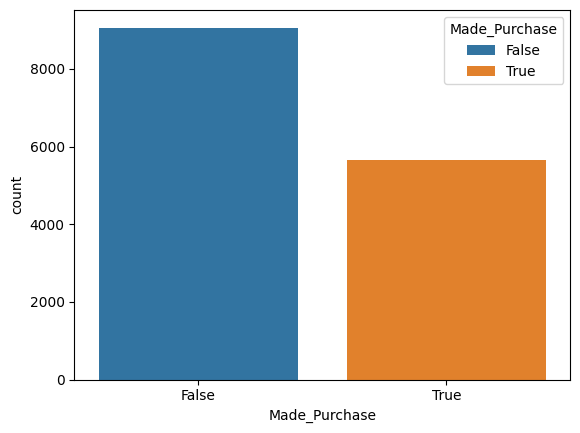

In [11]:
sns.countplot(raw_shopper_df, x='Made_Purchase', hue='Made_Purchase');

The countplot introduces us to the data in the target column and from the plot we can deduce that:

1. **Class Imbalance**: There's a noticeable imbalance in the target classes. The number of instances where consumers did not make a purchase (False) is significantly higher than the instances where they did (True). This imbalance will need to be taken into account when developing a predictive model to ensure it doesn't become biased towards predicting the more frequent class.

2. **Modeling Implications**: Because of the class imbalance, accuracy alone may not be a reliable indicator of model performance, since a model that always predicts the majority class would appear to be highly accurate. Precision, recall, and the F1-score are more informative metrics in such cases. Techniques like class weighting, oversampling the minority class, undersampling the majority class, or using anomaly detection algorithms could be considered to handle the imbalance.

3. **Predictive Modeling Focus**: Given the goal is to predict purchase behavior, the model might benefit from focusing on features that are indicative of stronger purchase intent. Factors like duration on product pages, the sequence of pages visited, and engagement with the checkout process could be particularly telling.

### Insights about the Numeric Columns

In this subsection of our exploratory data analysis, we delve deep into the patterns and distributions of the numeric variables provided in the dataset. This section is meticulously designed to uncover the nuances of consumer behavior through their engagement with a reputed retail website. By employing a variety of visualization techniques, including histograms and box plots, as well as applying logarithmic transformations to certain variables, we aim to achieve a comprehensive understanding of the data's characteristics.

This comprehensive analysis of numeric columns not only informs our preprocessing decisions but also sheds light on the intricacies of user behavior on the website. By identifying key variables and patterns that influence consumer decisions to make a purchase, we set the stage for the development of a predictive model.

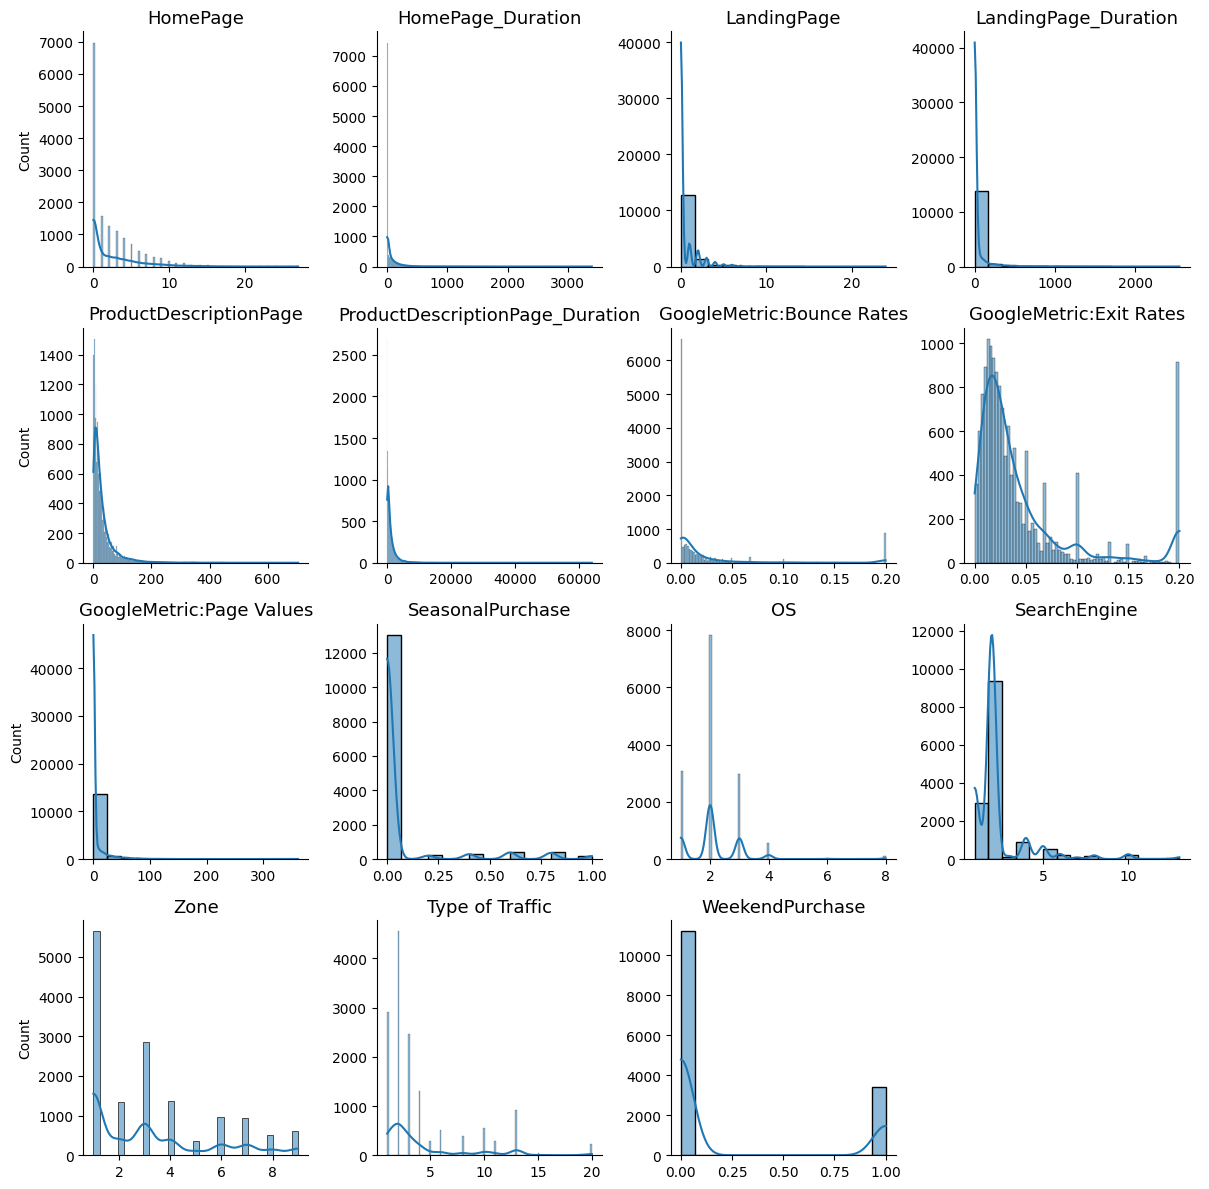

In [12]:
# Define the columns to plot
columns_to_plot = numerical_columns

# Melt the DataFrame so that we can use FacetGrid to create a grid of plots
melted_df = shopper_df.melt(value_vars=numerical_columns)

# Create a FacetGrid. Each histogram will be plotted in its own facet.
g = sns.FacetGrid(melted_df, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, 'value', kde=True)

# Add titles and adjust the plots for better presentation
g.set_titles("{col_name}", size=13)
g.set_axis_labels("", "Count")
g.add_legend()
plt.tight_layout()

# Show the plot
plt.show()

The insights that we can see from the patterns observed from the histplot include:

1. **Skewed Distributions**: The first set of histograms shows that many of the numeric variables are heavily right-skewed, with most values clustered near the lower end of the range and a long tail extending towards higher values. This is typical for count data and time duration on web pages, where many users might visit a page a few times or spend a short duration, while a few users might visit many times or spend a long time.

2. **Bounce and Exit Rates**: The histograms for the `GoogleMetric:Bounce Rates` and `GoogleMetric:Exit Rates` variables show a concentration of values at the lower end, indicating that most sessions have a low bounce and exit rate, which could suggest effective engagement for most users.

3. **Page Values**: The `GoogleMetric:Page Values` histogram shows that most pages have a low value, with only a few pages having a high value. This suggests that most pages are not directly preceding transactions or goal completions.

4. **Seasonal Purchase**: The `SeasonalPurchase` histogram shows that the majority of purchases are not seasonal, or the weight assigned to seasonal purchases is typically low.

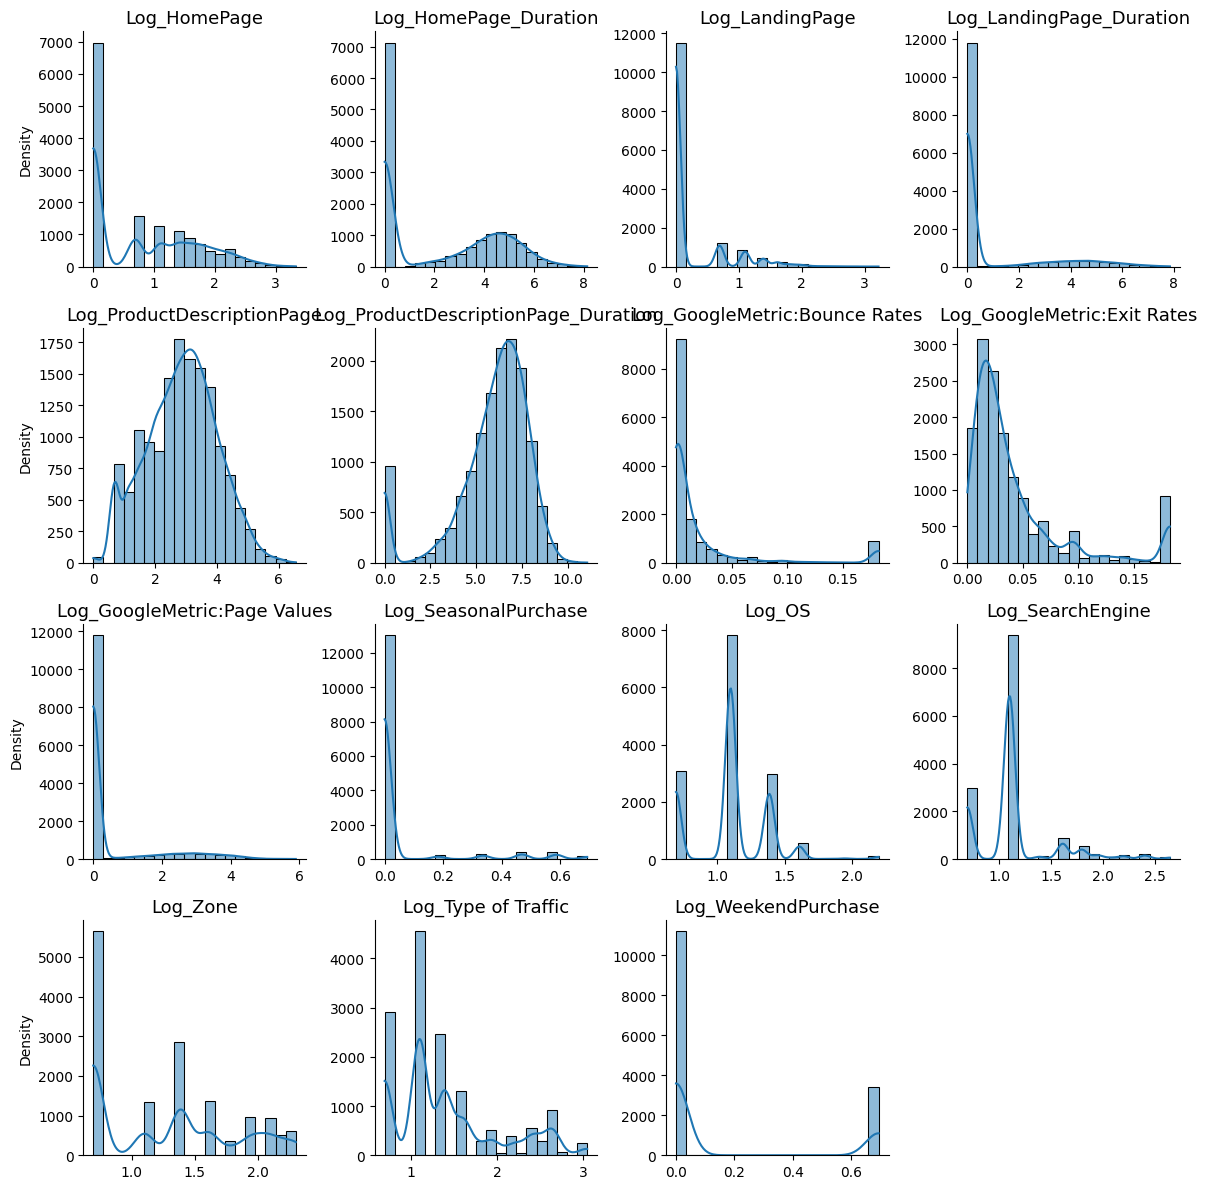

In [13]:
# Transform the specified columns using log1p (log(1+x)) to handle zero values
for col in numerical_columns:
    shopper_df[f'Log_{col}'] = np.log1p(shopper_df[col])

# List of the new log-transformed column names
log_columns = [f'Log_{col}' for col in numerical_columns]

# Melt the DataFrame for easier plotting with FacetGrid
melted_df = shopper_df.melt(value_vars=log_columns)

# Create a FacetGrid. Each histogram will be plotted in its own facet.
g = sns.FacetGrid(melted_df, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, 'value', kde=True, bins=20)

# Add titles and adjust the plots for better presentation
g.set_titles("{col_name}", size=13)
g.set_axis_labels("", "Density")
plt.tight_layout()

# Show the plot
plt.show()

A logarithmic transformation has been applied to normalize the distributions of the skewed variables. The insights that we can see from the patterns the histplot include:

1. **Effects of Log Transformation**:
   - For some variables like `HomePage`, `LandingPage`, `ProductDescriptionPage`, and their corresponding durations, the log transformation has made the distribution appear more symmetric, which can be beneficial for modeling.
   - For variables like `GoogleMetric:Page Values` and `SeasonalPurchase`, even after log transformation, the distributions still appear quite skewed. This indicates the presence of many zeros or very low values that do not change substantially with the log transformation.

2. **Bounce and Exit Rates**: These variables seem less affected by the log transformation due to the nature of rates being bounded between 0 and 1. They don't display the same degree of skewness as count or duration variables, to begin with.

3. **Categorical Variables**: Log transformation does not change the fact that `OS`, `SearchEngine`, `Zone`, `Type of Traffic`, and `WeekendPurchase` are inherently categorical; these variables still exhibit a non-continuous distribution even after the log transformation.

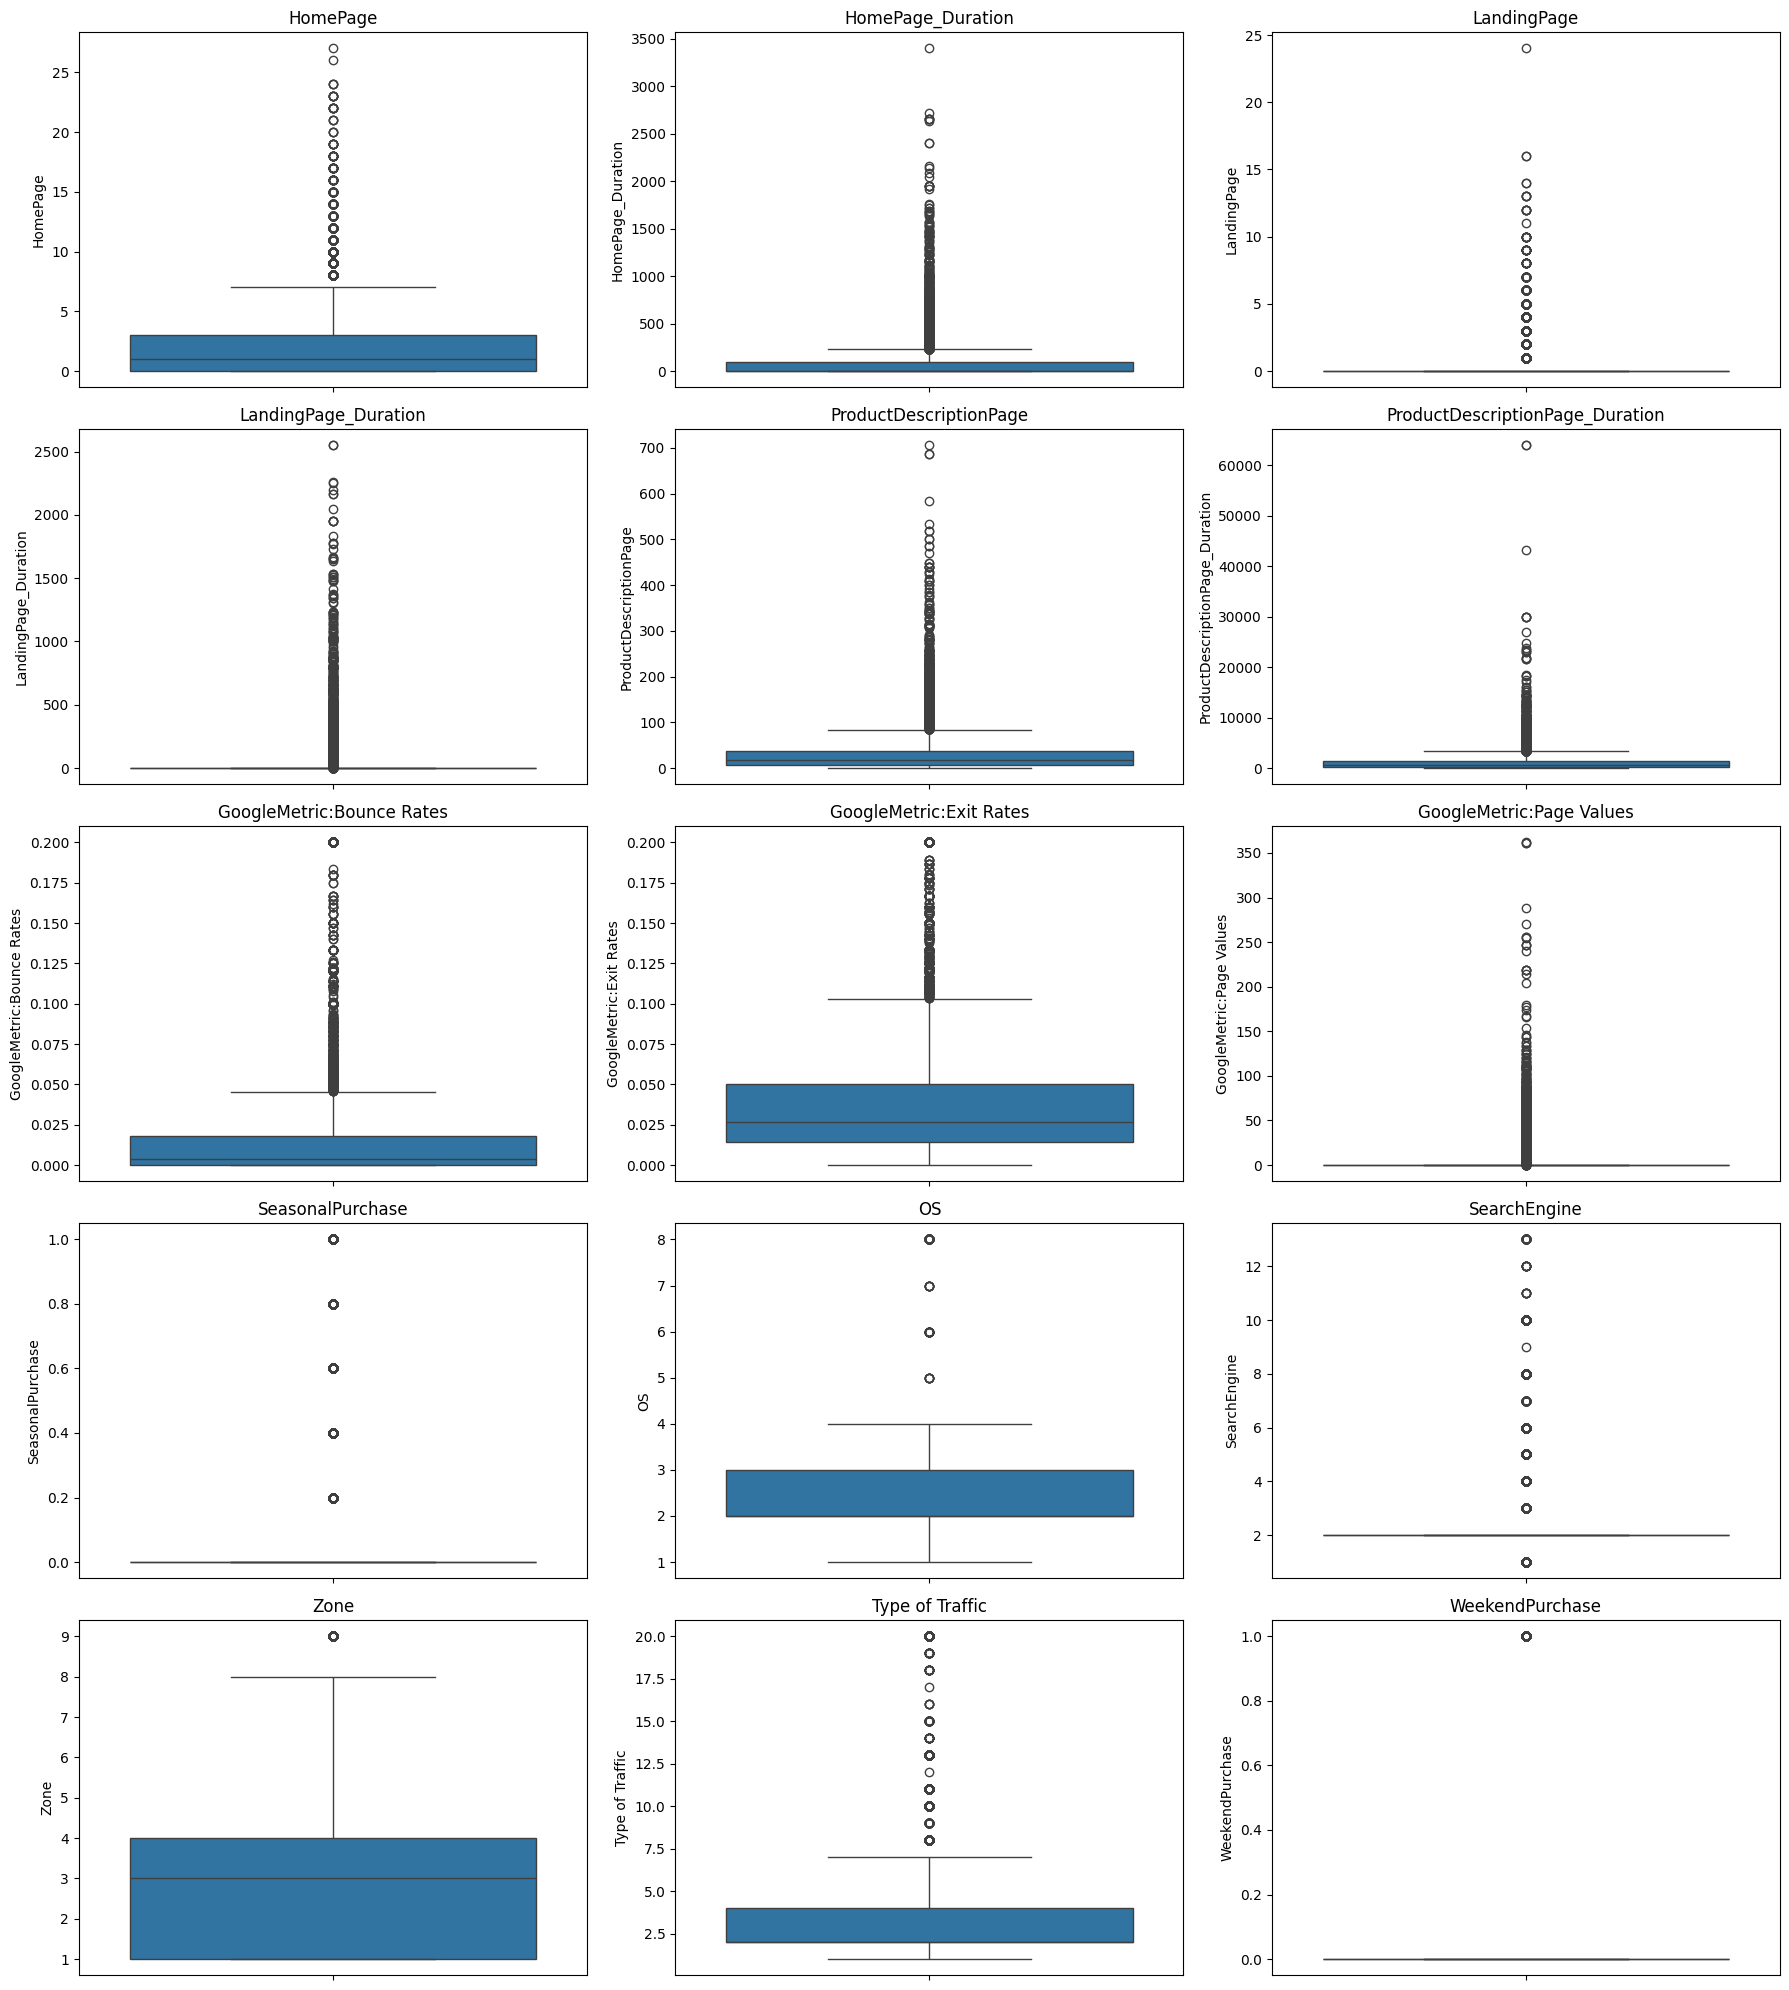

In [14]:
# Assuming shopper_df and numerical_columns are predefined
n_cols = 3  # Number of columns in the grid plot
n_rows = len(numerical_columns) // n_cols + (len(numerical_columns) % n_cols > 0)  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))  # Define the figure size dynamically
axes = axes.flatten()  # Flatten the axes for easy iteration

for i, column in enumerate(numerical_columns):
    # Use seaborn's boxplot to plot each numerical column against 'Made_Purchase'
    sns.boxplot(y=column, data=shopper_df, ax=axes[i])
    axes[i].set_title(column)

# Hide any unused axes if the number of plots is less than the number of subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

The visual summary of above provides insights into several important statistical measures including median, quartiles, and outliers. Let's derive insights from the box plots grid you've provided:

1. **HomePage, LandingPage, ProductDescriptionPage**: The box plots for these page visit count variables show that the median is very low, close to zero, with a lot of outliers. This suggests that most users visit these pages only a few times, but there is a subset of users with much higher page visits, which could be indicative of either high engagement or bots/spam.

2. **Duration Variables (HomePage_Duration, LandingPage_Duration, ProductDescriptionPage_Duration)**: These variables also show a lot of outliers and a median close to the lower end. This pattern indicates that while most users spend a short amount of time on these pages, there are users who spend a significantly longer time, which might be due to more interest or possibly leaving the page open without active engagement.

3. **GoogleMetric-Bounce Rates, GoogleMetric-Exit Rates**: Both metrics show a concentration of values at the lower end, with bounce rates slightly more spread out. There are outliers present in both, indicating sessions with exceptionally high bounce or exit rates.

4. **GoogleMetric-Page Values**: There are many outliers and the median is close to zero. This tells us that most pages contribute little to the final transaction, but a few have a significant value. Pages with high values are particularly important as they are likely the ones leading to conversions.

5. **SeasonalPurchase**: This variable shows a median of zero and several outliers, implying that seasonal purchases are not the norm but can occasionally be significant.

6. **Categorical Variables (OS, SearchEngine, Zone, Type of Traffic, WeekendPurchase)**: These appear to be categorical variables displayed as numerical values. The box plots show discrete levels with no outliers for OS and SearchEngine, suggesting a fixed number of categories. However, for Zone and Type of Traffic, there are outliers, which might indicate less common zones or traffic types that could be errors or rare but legitimate categories.

7. **Potential Data Quality Issues**: The presence of outliers suggests there may be data quality issues that need further investigation. It is essential to determine if outliers represent genuine variations in user behavior or data errors.

These box plots can guide preprocessing decisions and also help in understanding user behavior on the website. For instance, identifying pages with high duration and page values might be key in optimizing the site layout and content to enhance user engagement and conversion rates. Also there many ways we can deal with outliers in our data but deleting them wont be good for our model because for some columns their very many outliers.

### Insights about the Categoric Columns

In this subsection of our exploratory data analysis, we embark on a thorough examination of the categorical variables present in our dataset. This analysis is pivotal in unraveling the preferences, behaviors, and demographics of the consumers visiting the reputed retail website. By leveraging countplots and pie charts, we aim to visually depict the distribution and proportions of categories within each variable, thereby providing a nuanced understanding of the dataset's categorical dimensions.

The insights garnered from this section are instrumental in shaping our approach to data preprocessing and modeling. By understanding the categorical landscape of our dataset, we can better tailor our predictive model to capture the nuances of consumer behavior, ultimately aiming to forecast whether a consumer will make a purchase based on their interaction with the website. This section not only sheds light on the demographic and preference-based diversity of the website's user base but also sets the stage for subsequent data analysis and modeling efforts, ensuring that they are informed by a comprehensive understanding of all aspects of the data at our disposal.

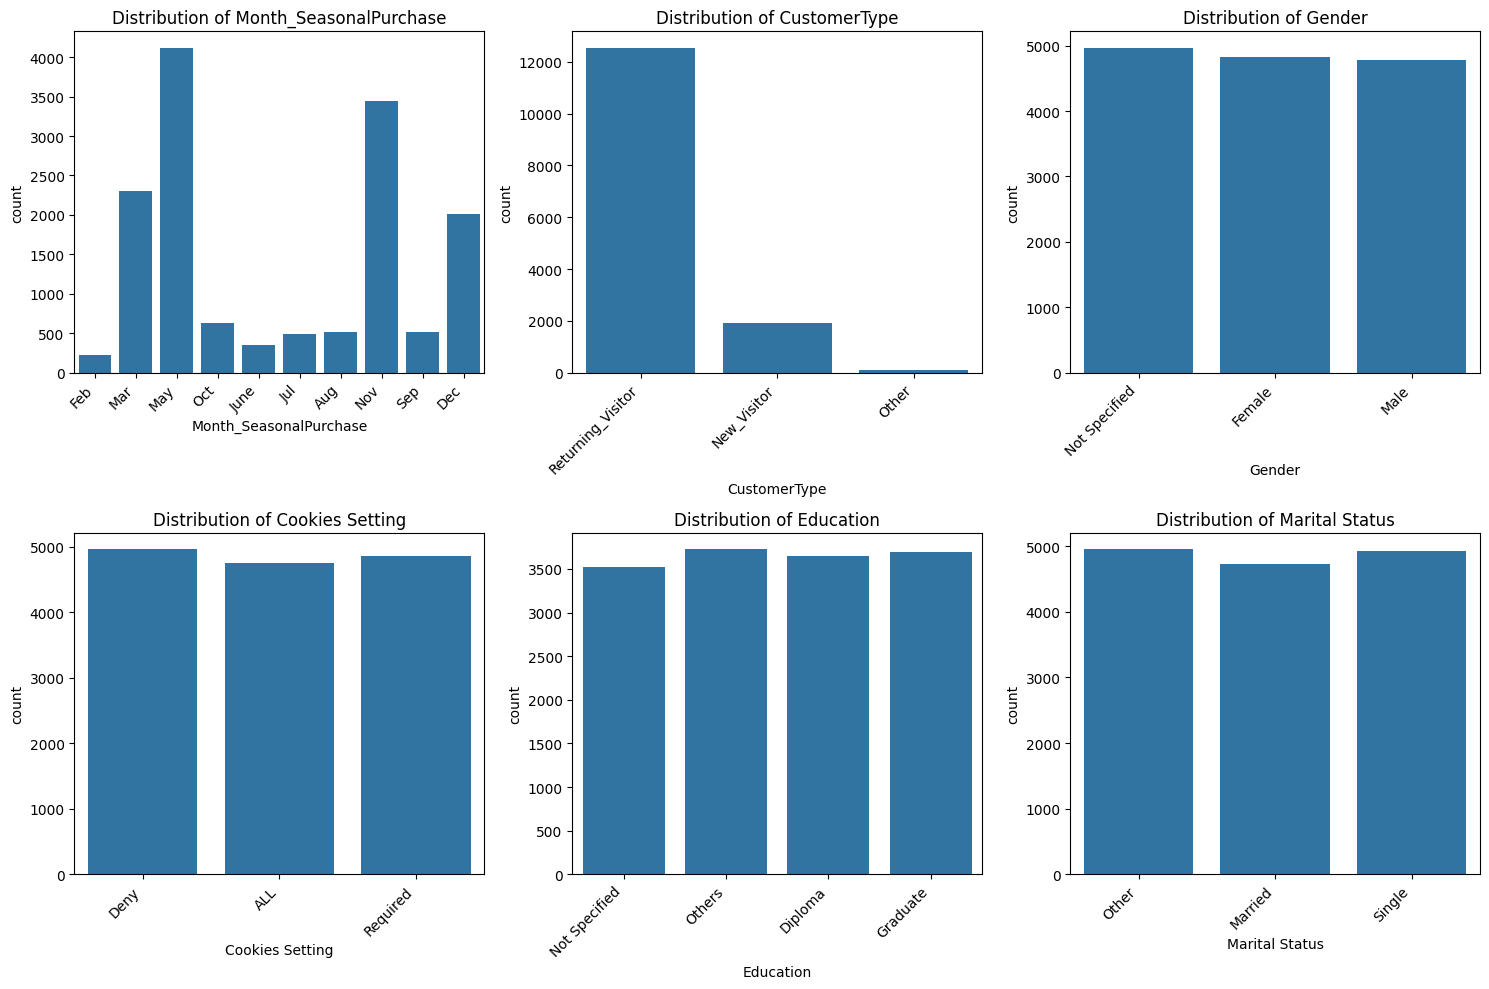

In [15]:
# Set up the matplotlib figure and axes
n_cols = 3  # Number of columns in the grid plot
n_rows = int(len(categoric_columns) / n_cols) + (len(categoric_columns) % n_cols > 0)

# Create a figure to hold the grid of plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a bar plot for each categorical column
for ax, column in zip(axes, categoric_columns):
    sns.countplot(x=column, data=shopper_df, ax=ax)
    ax.set_title(f'Distribution of {column}')
    # Rotate the tick labels for x-axis without using set_xticklabels()
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')  # Set horizontal alignment to right

# If there are any leftover axes, turn them off
for ax in axes[len(categoric_columns):]:
    ax.set_visible(False)

# Adjust the layout
plt.tight_layout()
plt.show()

The grid shows bar chart represents the count distribution across the categories of each categorical variable in the dataframed. Let's interpret each chart:

1. **Month_SeasonalPurchase**:
   - This variable shows peaks in certain months (March, May and November), which likely correspond to specific seasonal events or holidays when purchases are higher (e.g., November for Black Friday). It indicates seasonality in purchasing behavior.

2. **CustomerType**:
   - A significant majority of the customers are returning visitors, which suggests a loyal customer base or effective customer retention strategies. A smaller proportion are new visitors, which could be an area for growth.

3. **Gender**:
   - The distribution across genders is relatively balanced, with 'Not Specified' representing a significant proportion. This suggests that not all users are willing to share their gender, or that the option may not be mandatory on the website.

4. **Cookies Setting**:
   - The distribution among different cookie settings is fairly even, suggesting a balance in users' privacy preferences.

5. **Education**:
   - The distribution is relatively uniform across different education levels, with 'Graduate' being slightly higher. This may indicate that the website's user base has a varied educational background, or that graduates are slightly more inclined to use the site.

6. **Marital Status**:
   - The counts of 'Single' and 'Married' are similar, with 'Other' being slightly less. This indicates a diverse user base in terms of marital status.

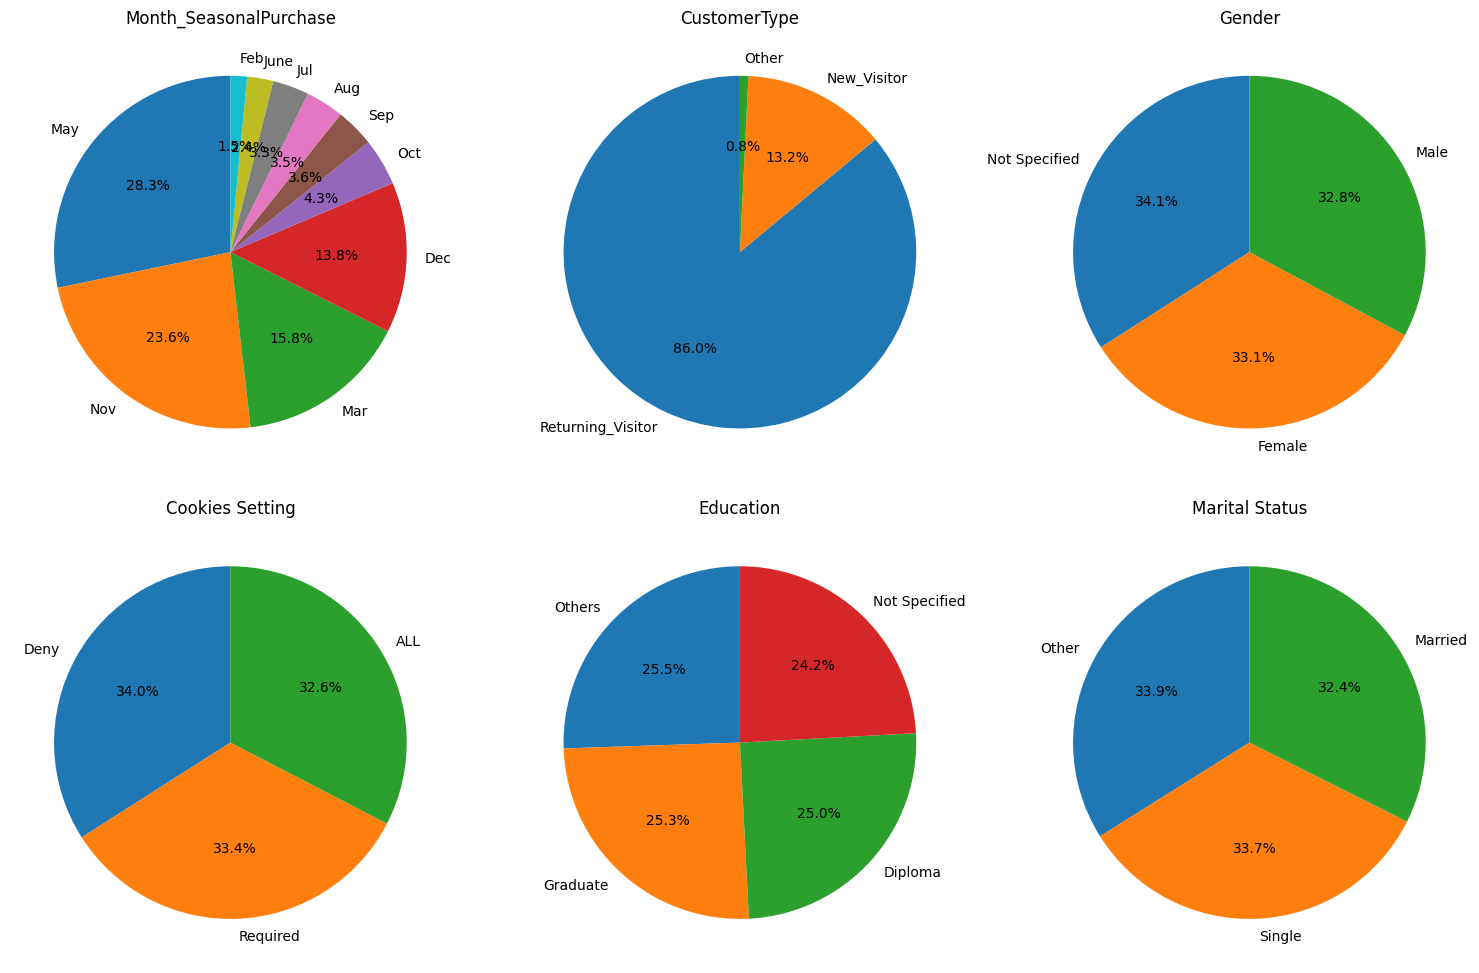

In [16]:
# Determine the layout of your subplots
n_cols = 3  # You want 3 columns of subplots
n_rows = len(categoric_columns) // n_cols + (len(categoric_columns) % n_cols > 0)

# Create a figure to hold all the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
# If only one row, axes must be an array
if n_rows == 1:
    axes = np.array([axes])

# Flatten the axes array for easy iteration if there's more than one row
axes = axes.flatten()

# Plot a pie chart for each categorical column
for i, column in enumerate(categoric_columns):
    ax = axes[i]
    # Get value counts for each category
    counts = shopper_df[column].value_counts()
    # Plot the pie chart
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(column)

# If there are any subplots without a pie chart, hide those axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

The pie charts provide a visual representation of the proportion of each category within the categorical variables. In addition to the insights from the grid of countplots we can deduce:

1. **Month_SeasonalPurchase**:
   - The largest segments of the pie chart are for November and May, which may indicate popular times for seasonal purchases, possibly due to events like Black Friday, Cyber Monday, or holidays like Mother's Day.
   - Fewer purchases are made in the months of February, June, July, and August, which could indicate either a lack of major shopping holidays in those months or possibly seasonal trends where customers are less likely to purchase.

2. **Cookies Setting**:
   - The distribution is fairly even across the three categories ('Deny', 'ALL', 'Required'), indicating a balanced split in users' cookie preferences on the website.

From these pie charts, we can infer the following:

- The time of year has a significant impact on purchasing behavior, with some months leading to higher seasonal purchase volumes than others.
- Users' decisions about cookie settings are quite varied, with no single option dominating. This might reflect a diversity of privacy preferences and awareness among users.

### Insights between the categories and the target column

In this subsection of our analysis, we delve into the intricate relationships between categorical variables and the critical outcome of interest: whether a consumer makes a purchase on the website. This exploration is vital for uncovering patterns and trends that may not be immediately apparent from a cursory glance at the data. By utilizing countplots and bar charts to visualize these relationships, alongside a detailed examination of correlation metrics for numerical features, we aim to distill meaningful insights that could significantly impact business strategies and predictive modeling efforts.

By synthesizing these insights, we draw critical conclusions about user behavior and the factors influencing purchasing decisions on the website. This comprehensive analysis not only informs feature engineering and model development but also offers valuable business insights, such as the potential for optimizing marketing strategies and improving customer engagement. Through this section, we provide a nuanced understanding of the dynamics at play between categorical variables and the likelihood of making a purchase, setting the stage for informed decision-making and strategic planning.

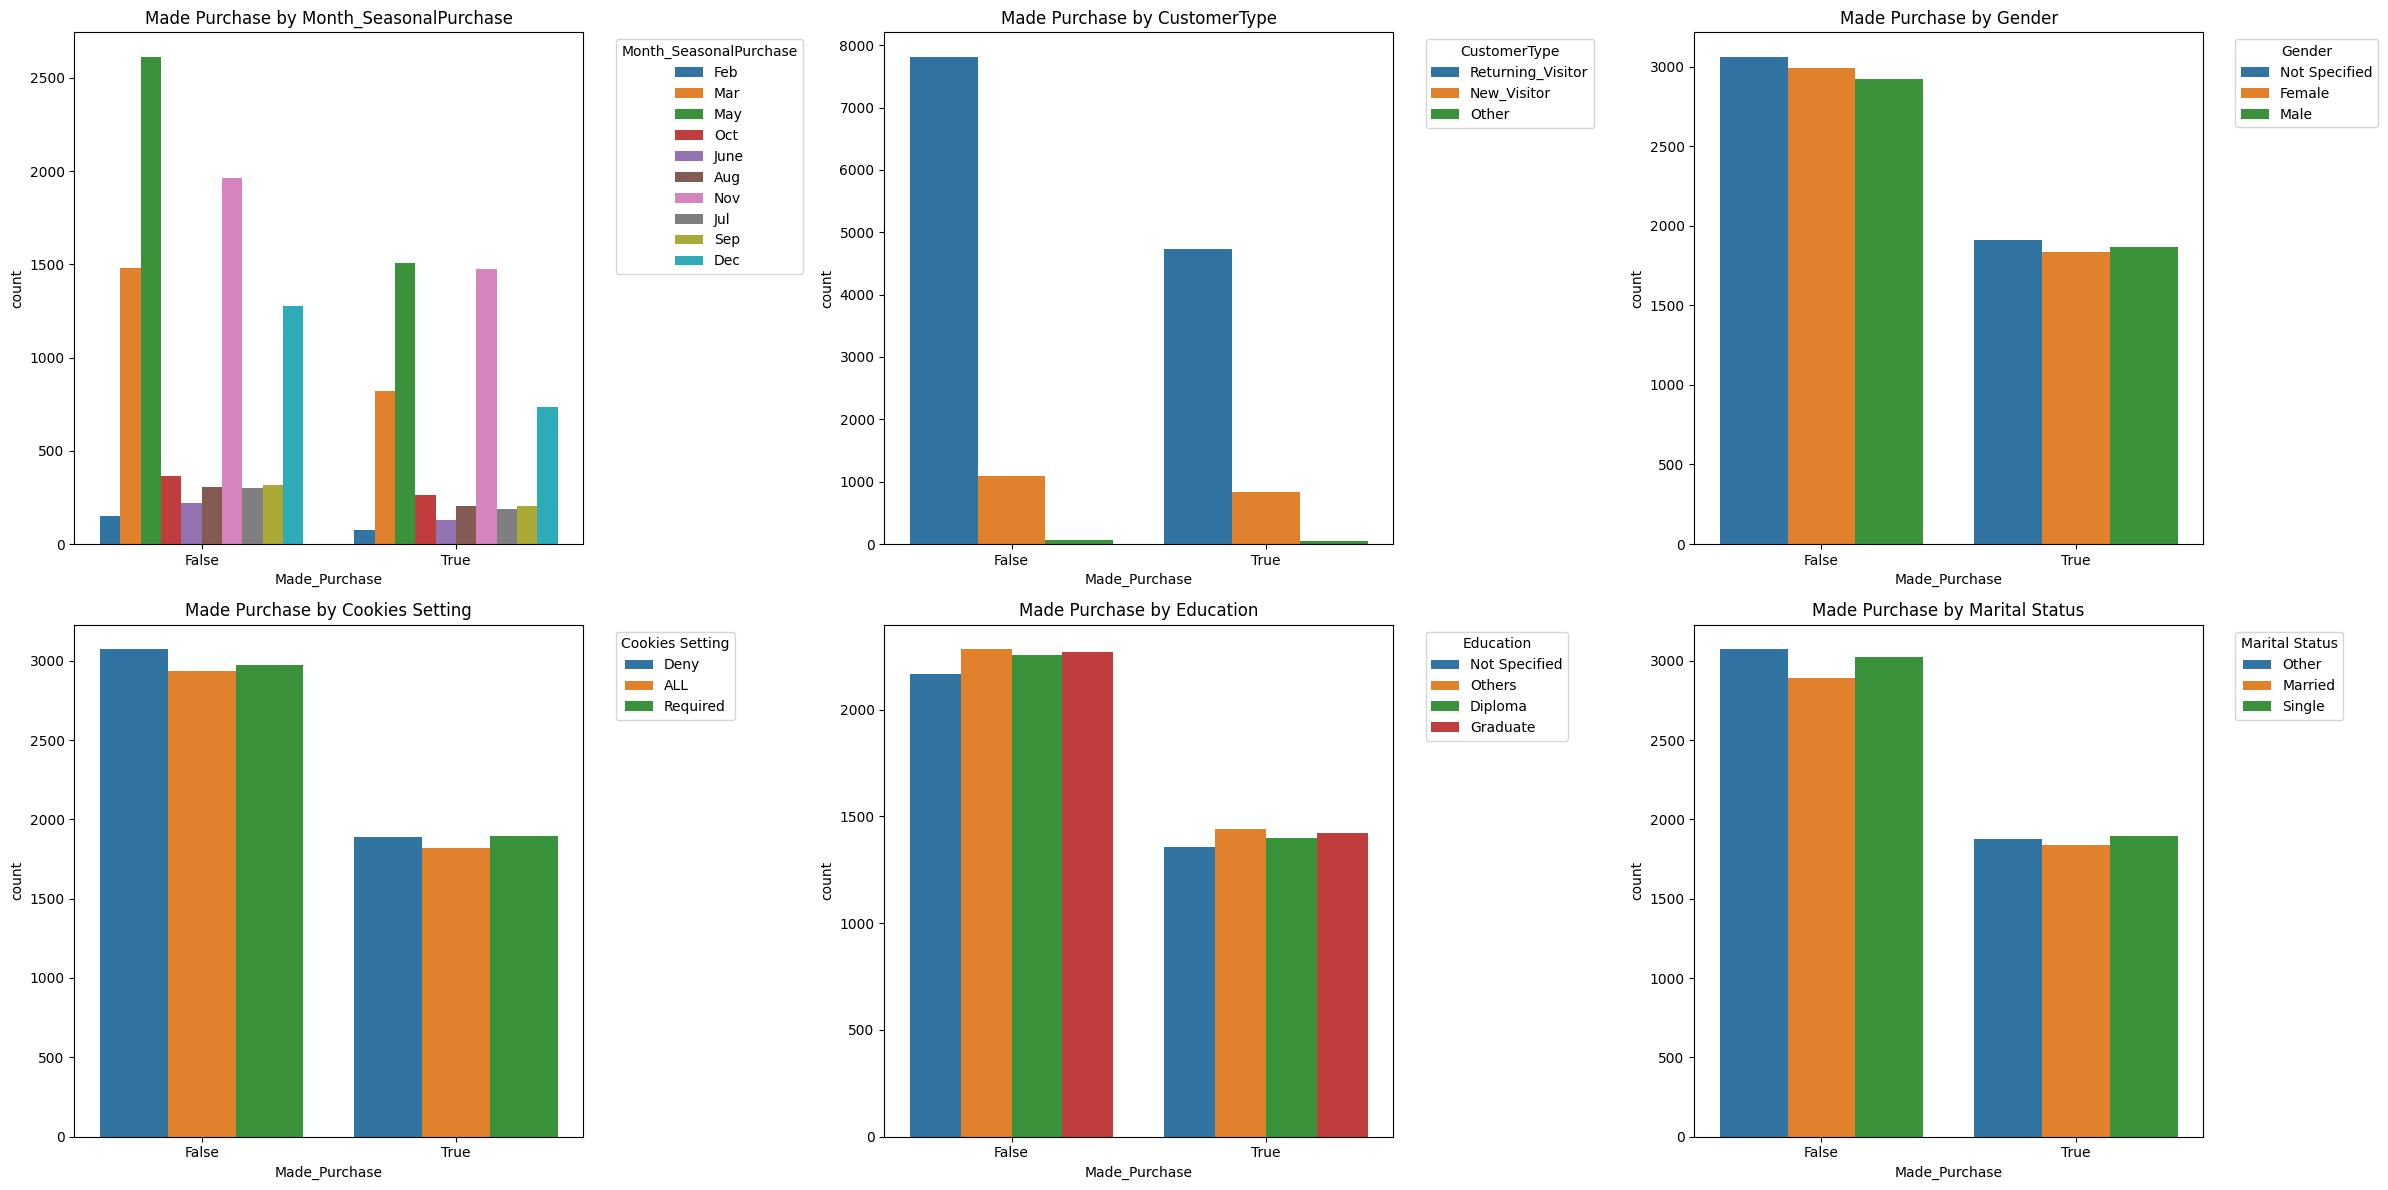

In [17]:
# Set up the matplotlib figure and axes
n_cols = 3  # Number of columns in the grid plot
n_rows = len(categoric_columns) // n_cols + (len(categoric_columns) % n_cols > 0)

# Create a figure to hold the grid of plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))
axes = axes.flatten()  # Flatten to make iteration easier if it's a multidimensional array

# Iterate over each categorical column and create a count plot with Made_Purchase as the x variable and the column as hue
for i, column in enumerate(categoric_columns):
    sns.countplot(x='Made_Purchase', hue=column, data=shopper_df, ax=axes[i])
    axes[i].set_title(f'Made Purchase by {column}')
    axes[i].legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

From the grid showing the relationship between various categorical variables and the target column 'Made_Purchase', we can interpret the following:

1. **Month_SeasonalPurchase and Made_Purchase**:
   - Certain months have higher counts of purchases, which suggests a strong seasonality effect on purchasing behavior. For example, there are months where the 'True' purchases are notably higher, possibly aligning with seasonal events or sales.

2. **CustomerType and Made_Purchase**:
   - A significant majority of purchases are made by returning visitors, indicating customer loyalty or that repeat customers are more likely to make a purchase than new visitors. This could inform customer retention strategies.

3. **Cookies Setting and Made_Purchase**:
   - All cookie settings ('Deny', 'ALL', 'Required') appear to have similar distributions of 'Made_Purchase', which suggests that cookie preference settings do not significantly influence the likelihood of a purchase.

4. **Education and Made_Purchase**:
   - The distributions across different education levels are relatively similar in terms of purchasing behavior, suggesting that education level might not be a strong differentiator in predicting purchases.

5. **Gender and Made_Purchase**:
   - The distribution of purchases across genders seems fairly even, indicating that gender might not be a significant factor in the likelihood of making a purchase.

6. **Marital Status and Made_Purchase**:
   - The counts of purchases versus non-purchases across marital status ('Single', 'Married', 'Other') are also relatively similar, indicating that marital status may not be a decisive factor in predicting purchases.

**Bussiness insights to note for Feature engineering**

- **Returning customers are a key demographic**: Since they are more likely to purchase, marketing strategies and customer experience improvements should cater to this group to enhance loyalty and repeat business.

- **Seasonality matters**: Certain months significantly influence purchasing behavior, which could be critical for inventory planning, marketing campaigns, and sales strategies.

- **Cookie settings may not impact purchase behavior**: The lack of a clear difference based on cookie settings suggests that purchase decisions might be more influenced by other factors, such as product selection or pricing strategies.

- **Demographic factors may be less predictive**: Education, gender, and marital status show a uniform distribution across purchase behavior, suggesting that these may not be the strongest predictors of whether a customer will make a purchase. This could be an indication to look for other, more behaviorally driven features that correlate with purchase decisions.

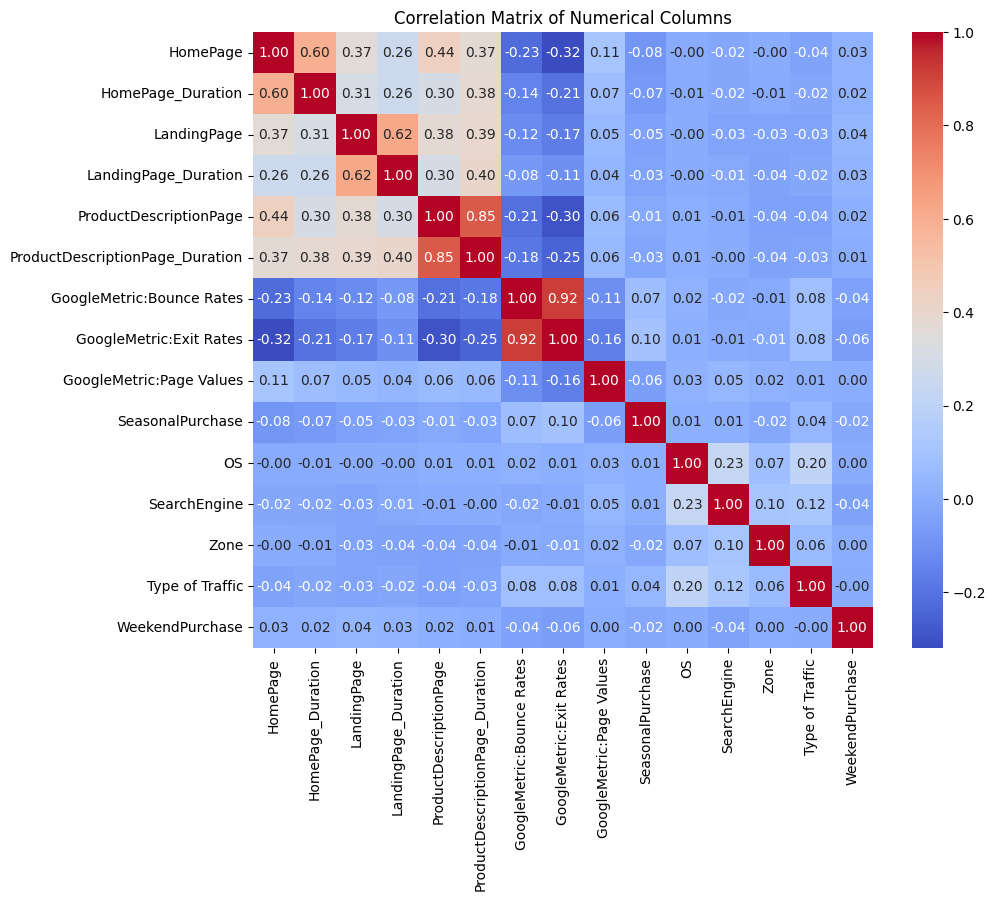

In [18]:
# Compute correlation for numerical columns only
numerical_corr = shopper_df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(numerical_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

The heatmap visualizes the correlation matrix for the numerical columns in the dataset. Correlation values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. Let's interpret the notable correlations depicted:

1. **HomePage and HomePage_Duration**: There's a strong positive correlation (0.60), which is expected as the more times a user visits the home page, the longer the duration they are likely to spend there.

2. **ProductDescriptionPage and ProductDescriptionPage_Duration**: Similarly, there's a very strong positive correlation (0.85) between the number of visits to the product description page and the duration spent on it, suggesting that as users visit these pages more often, they spend significantly more time there.

3. **Bounce Rates and Exit Rates**: These two metrics have a very high positive correlation (0.92), indicating that pages with a high bounce rate often also have a high exit rate. This makes sense as both metrics are related to users leaving the site.

4. **LandingPage and LandingPage_Duration**: These also have a strong positive correlation (0.62), indicating that increased visits to the landing page are associated with increased time spent on it.

5. **HomePage and LandingPage**: A moderate positive correlation (0.37) suggests that users who visit the home page also tend to visit the landing page.

6. **ProductDescriptionPage and HomePage**: A moderate positive correlation (0.44) suggests that there's a relationship between visiting the home page and visiting the product description page, possibly indicating a common navigation path.

7. **GoogleMetric:Page Values and Made_Purchase**: There's a small positive correlation (0.11 with HomePage and 0.06 with Made_Purchase), suggesting that as the page value increases, there's a slight tendency for these pages to be associated with successful transactions.

**Insights for Model Building and Business Strategy:**

- **Feature Interdependence**: The strong correlations between page visits and their durations suggest these features are not independent and could contribute multicollinearity if used together in linear models. Feature selection or dimensionality reduction techniques might be needed.

- **Page Value as a Metric**: While the correlation is low, the positive relationship with Made_Purchase suggests that page value might still be an important feature for predicting purchase behavior.

- **Bounce and Exit Rate Metrics**: Their high correlation might mean they carry similar information; it could be redundant to include both in a predictive model. Choosing one or combining them could be more effective.

- **User Journey Analysis**: The correlations between HomePage, LandingPage, and ProductDescriptionPage suggest there's a typical user journey that could be explored further for insights into user behavior and could influence website design for better user experience.

- **High Correlation between Page Visits and Duration**: The strong positive correlations between the HomePage, LandingPage, ProductDescriptionPage, and their respective duration suggest that the more a user interacts with a page, the longer they stay on it. This relationship is intuitive and supports the idea that engagement metrics are interrelated.

- **Bounce Rates and Exit Rates**: The very high correlation (0.92) indicates that these two metrics often move together. If a user bounces, they also contribute to the exit rate. This high correlation suggests that for predictive modeling or analysis, one of these features might suffice, as they provide similar information.

- **Low Correlation with SeasonalPurchase**: SeasonalPurchase appears to have very low correlation with other features, indicating that it does not vary much with the user's behavior on the website in terms of page visits and duration. This could mean that whether a purchase is seasonal or not is independent of how users interact with the website.

- **Weak Correlations with OS and SearchEngine**: The correlation between OS, SearchEngine, and other features are weak, suggesting that these factors do not have a strong linear relationship with the user's behavior on the website.

- **Type of Traffic and Zone**: There are no strong correlations between these features and others, suggesting that they are relatively independent of the users' engagement metrics on the website.

- **Weekend Purchase Behavior**: WeekendPurchase has a very low correlation with all other features, implying that the fact of a purchase happening on a weekend is not strongly related to other measured behaviors.

- **GoogleMetric:Page Values**: This feature has some of the higher correlations with bounce and exit rates, though still relatively low, which could suggest that pages with higher value might be better at retaining users, or conversely, when users exit or bounce, they are less likely to have interacted with pages that have higher values.

In [19]:
def correlation_with_target(df, target_column):
    """
    Calculates the correlation between each column in the DataFrame and the target column.

    Parameters:
    - df: pandas DataFrame containing the data.
    - target_column: String specifying the column name of the target variable.

    Returns:
    A pandas Series containing the correlation values between each column and the target column.
    """
    # Check if the target column exists in the DataFrame
    if target_column not in df.columns:
        raise ValueError(f"The target column '{target_column}' does not exist in the DataFrame.")

    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Extract the correlations with the target column
    correlations_with_target = correlation_matrix[target_column]

    # Return the correlations with the target, excluding the target column itself
    return correlations_with_target.drop(target_column)

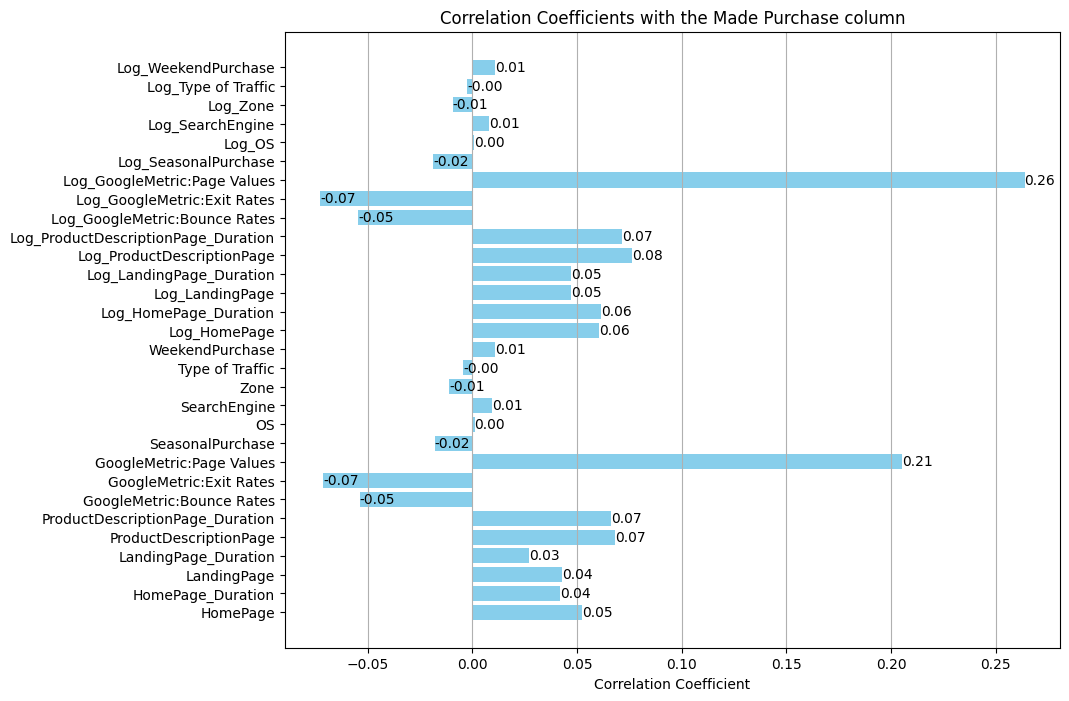

In [20]:
# Adding Made_Purchase to the list of numeric columns
# Convert to list and append 'Made_Purchase'
numerical_columns_list = (shopper_df.select_dtypes(include=['int', 'float'])).columns.tolist()
numerical_columns_list.append('Made_Purchase')

numerical_list_corr = correlation_with_target(shopper_df[numerical_columns_list], 'Made_Purchase')

# Convert the Series to a DataFrame for easier plotting
df_corr = numerical_list_corr.to_frame(name='Correlation')
df_corr['Variables'] = df_corr.index

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.barh(df_corr['Variables'], df_corr['Correlation'], color='skyblue')
plt.xlabel('Correlation Coefficient')
plt.title('Correlation Coefficients with the Made Purchase column')
plt.grid(axis='x')  # Add grid lines for better readability

# Annotate the bars with the correlation values formatted to 2 decimal places
for index, value in enumerate(df_corr['Correlation']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()

The bar chart illustrates the correlation coefficients between various numerical features and the target column 'Made_Purchase'.
The analysis of correlations between various numerical variables and the 'Made_Purchase' target column reveals several insights:

- **Highest Positive Correlation**: The `Log_GoogleMetric:Page Values` variable has the highest positive correlation with the 'Made_Purchase' target, with a correlation coefficient of approximately 0.2638. This indicates a strong positive relationship, suggesting that pages with higher value are more likely to be visited before a purchase is made.

- **Other Notable Positive Correlations**:
  - `GoogleMetric:Page Values` without the logarithmic transformation also shows a significant positive correlation (about 0.2052), though less than its logarithmic counterpart.
  - `Log_ProductDescriptionPage` and `Log_ProductDescriptionPage_Duration` both show positive correlations above 0.07, indicating that the number of times and the duration spent on the product description page, especially when transformed logarithmically, have a positive effect on the likelihood of making a purchase.

- **Variables with Little to No Correlation**: Variables like `OS`, `Log_OS`, and `SearchEngine` have correlations close to zero, indicating little to no linear relationship with the 'Made_Purchase' target.

- **Negative Correlations**:
  - `GoogleMetric:Exit Rates` and its logarithmic version have the most substantial negative correlations with 'Made_Purchase' (around -0.0713 and -0.0727, respectively), suggesting that pages with higher exit rates negatively impact the likelihood of making a purchase.
  - `GoogleMetric:Bounce Rates` and its logarithmic transformation also show negative correlations (about -0.0537 and -0.0546, respectively), further indicating that a higher bounce rate reduces the likelihood of making a purchase.

- **Insightful Observations**:
  - Logarithmic transformations of page metrics (`Page Values`, `ProductDescriptionPage`, and corresponding durations) tend to have higher correlations with the 'Made_Purchase' target. This suggests that the relationship between these variables and purchase likelihood may be more exponential than linear.
  - Seasonal factors and traffic types have very low to slightly negative correlations with making a purchase, indicating these may not be strong predictors in this context.

## Pre_Processing

The "Preprocessing" section of the notebook meticulously addresses the foundational steps required to prepare the dataset for machine learning modeling. It begins by identifying and handling missing values to ensure data integrity and unbiased analysis. The process then transitions to transforming categorical variables into a machine-readable format through one-hot encoding, enhancing the dataset's utility for modeling. Subsequent feature engineering introduces innovative variables, unveiling deeper insights and relationships. Finally, feature scaling normalizes the data, optimizing model performance by equalizing the influence of each variable. Collectively, these preprocessing steps form a comprehensive approach to refining the dataset, setting a robust foundation for predictive modeling.

### NANs

In this subsection, we scrutinize the dataset's missing values, revealing varying degrees of incompleteness across columns. A bar chart illustrates each column's percentage of NaNs, highlighting potential data quality issues and guiding decisions on imputation or removal strategies. This analysis is crucial for ensuring the integrity of subsequent analyses or predictive modeling, as handling missing data effectively is key to mitigating bias and enhancing model accuracy. The section underscores the importance of addressing these gaps to maintain the dataset's overall quality and reliability.

In [21]:
nan_values = shopper_df.isna().sum().sort_values(ascending=False)/len(raw_shopper_df)*100
nan_values

ProductDescriptionPage_Duration        1.133664
Log_ProductDescriptionPage_Duration    1.133664
HomePage                               1.038626
Log_LandingPage                        1.038626
LandingPage                            1.038626
Log_HomePage                           1.038626
GoogleMetric:Bounce Rates              1.025049
Log_GoogleMetric:Bounce Rates          1.025049
Log_HomePage_Duration                  1.018261
SeasonalPurchase                       1.018261
HomePage_Duration                      1.018261
Log_SeasonalPurchase                   1.018261
Gender                                 0.984319
Month_SeasonalPurchase                 0.977530
CustomerType                           0.977530
Cookies Setting                        0.977530
Log_Type of Traffic                    0.970742
Type of Traffic                        0.970742
Education                              0.923223
LandingPage_Duration                   0.916435
Log_LandingPage_Duration               0

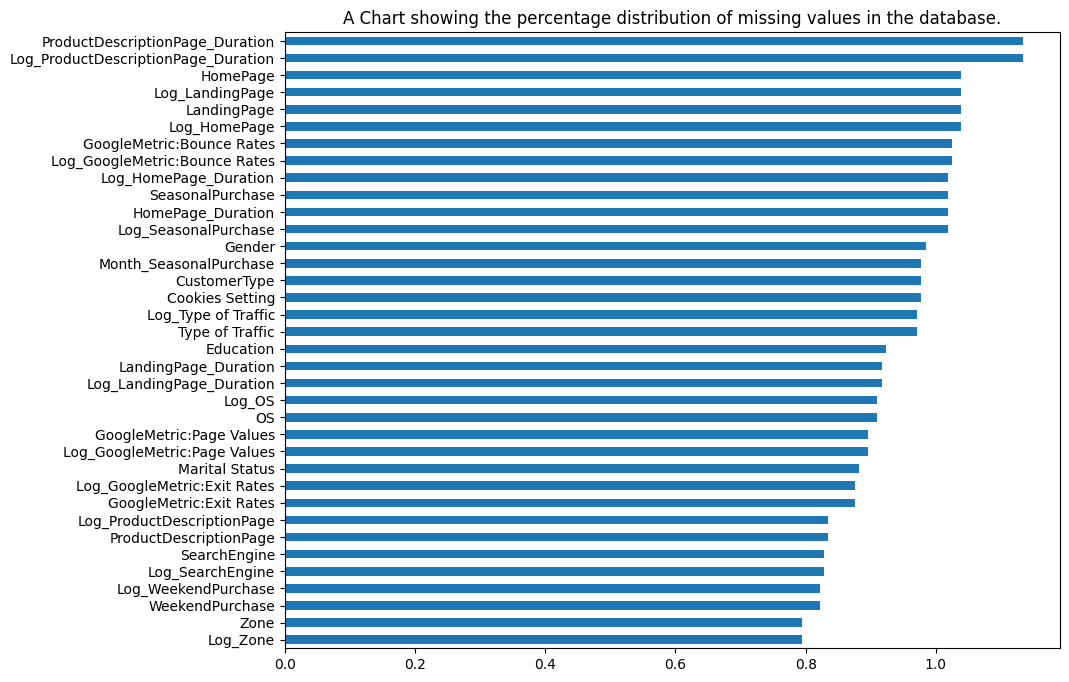

In [22]:
# Sort the Series containing the values in descending order
sorted_values = nan_values[nan_values != 0].sort_values(ascending=True)

# Set the figure size
plt.figure(figsize=(10, 8))  # You can adjust the dimensions (width, height) as needed

# Plot the sorted values with increased figure size
sorted_values.plot(kind='barh').set(title="A Chart showing the percentage distribution of missing values in the database.")

plt.show()  # Display the plot

The bar chart depicting the percentage of NaNs (missing values) per column provides insights into the completeness of the dataset and the potential data quality issues that might need addressing before analysis or modeling:

1. **Some columns have a higher percentage of missing values**: Columns like `ProductDescriptionPage_Duration` and `HomePage` show larger bars, indicating a higher proportion of missing data. These gaps could potentially impact any analysis or predictive models that rely on these features.

2. **Data Imputation or Removal Decisions**: Depending on the percentage of missing values, different strategies may be needed to handle them. If the percentage is low, removing those rows could be a viable option. For higher percentages, imputation methods (mean, median, mode, etc., or more complex algorithms) might be necessary.

3. **Assessment of Data Collection Processes**: High percentages of missing data in certain columns may indicate problems with the data collection process. It may be necessary to review how data is gathered and whether improvements could reduce these issues in the future.

4. **Impact on Predictive Modeling**: Features with significant amounts of missing data may lead to biased or less accurate models if not properly handled. It's also important to ensure that the method of handling missing data aligns with the assumptions and requirements of the chosen modeling techniques.

5. **Potential Bias in Analysis**: The presence of missing data can introduce bias into the analysis, particularly if the missingness is not random (Missing Not At Random - MNAR). Understanding the pattern and reasons behind missing data is important to address potential biases.

6. **Data Quality Assessment**: The overall data quality can be assessed by the amount of missing data. High-quality datasets typically have fewer missing values, indicating thorough and consistent data collection methods.

Before any substantial analysis or modeling, it would be important to address these missing values in a way that is statistically sound and aligns with the objectives of the analysis. This could also influence the choice of machine learning algorithms, as some are more robust to missing data than others.

In [23]:
def fill_nans_in_df(df):
    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Check if the column contains NaNs
        if df[column].isna().any():
            # Determine the data type of the column
            if df[column].dtype == 'object':
                # For object types, fill NaNs with the previous value in the same group of 'Made_Purchase'
                df[column] = df.groupby('Made_Purchase')[column].transform(lambda x: x.fillna(method='ffill'))
                # Additionally fill NaNs with the next value in the same group for cases where the first value is NaN
                df[column] = df.groupby('Made_Purchase')[column].transform(lambda x: x.fillna(method='bfill'))
            else:
                # For numeric types, fill NaNs with the mean of the group
                df[column] = df.groupby('Made_Purchase')[column].transform(lambda x: x.fillna(x.mean()))
    return df

In [24]:
# Assuming raw_shopper_df is your DataFrame
filled_shopper_df = fill_nans_in_df(raw_shopper_df.copy())

In [25]:
nan_values1 = filled_shopper_df.isna().sum().sort_values(ascending=False)/len(filled_shopper_df)*100
nan_values1

HomePage                           0.0
HomePage_Duration                  0.0
WeekendPurchase                    0.0
Marital Status                     0.0
Education                          0.0
Cookies Setting                    0.0
Gender                             0.0
CustomerType                       0.0
Type of Traffic                    0.0
Zone                               0.0
SearchEngine                       0.0
OS                                 0.0
Month_SeasonalPurchase             0.0
SeasonalPurchase                   0.0
GoogleMetric:Page Values           0.0
GoogleMetric:Exit Rates            0.0
GoogleMetric:Bounce Rates          0.0
ProductDescriptionPage_Duration    0.0
ProductDescriptionPage             0.0
LandingPage_Duration               0.0
LandingPage                        0.0
Made_Purchase                      0.0
dtype: float64

### One-Hot Encoding

In this subsection, we implement a function to transform specified categorical columns within a DataFrame into a one-hot encoded format. This process, crucial for preparing the data for machine learning models, involves converting categorical values into binary vectors. The section outlines the function's design to initialize and fit a OneHotEncoder, transform the data, and concatenate the newly encoded columns back to the original DataFrame, dropping the initial categorical columns. This method ensures the dataset is optimally prepared for predictive modeling.

In [26]:
def one_hot_encode_df(df, categoric_columns):
    """
    Performs one-hot encoding on the specified categorical columns of a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame to be processed.
    - categoric_columns (list of str): List of column names in the DataFrame that are categorical and need to be one-hot encoded.

    Returns:
    - pd.DataFrame: A new DataFrame with the original columns plus the one-hot encoded columns.
    - OneHotEncoder: The fitted OneHotEncoder instance used for the transformation.
    """

    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # Fit the encoder on the categorical columns
    encoder.fit(df[categoric_columns])

    # Get the new one-hot encoded column names
    encoded_cols = list(encoder.get_feature_names_out(categoric_columns))

    # Transform the categorical columns and create a DataFrame with these new columns
    encoded_df = pd.DataFrame(encoder.transform(df[categoric_columns]), columns=encoded_cols)

    # Ensure the index aligns with the original DataFrame
    encoded_df.index = df.index

    # Concatenate the original DataFrame with the new one-hot encoded columns
    result_df = pd.concat([df, encoded_df], axis=1)
    # Dropping the original categorical columns
    new_result_df = result_df.drop(categoric_columns, axis=1)

    return new_result_df, encoder, encoded_cols

In [27]:
# Perform one-hot encoding
encoded_shopper_df, fitted_encoder, fitted_encoder_cols = one_hot_encode_df(filled_shopper_df, categoric_columns)

In [28]:
encoded_shopper_df

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Cookies Setting_ALL,Cookies Setting_Deny,Cookies Setting_Required,Education_Diploma,Education_Graduate,Education_Not Specified,Education_Others,Marital Status_Married,Marital Status_Other,Marital Status_Single
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Feature Engineering

In this subsection, we apply a series of transformations to enhance the dataset with new, informative features, tailored to improve model performance. Techniques include binarizing duration to distinguish reading depth, creating interaction features between metrics, scaling values for normalization, summing durations for a comprehensive engagement measure, identifying peak shopping seasons, and calculating visitor profile scores based on demographic information. This tailored augmentation of the dataset is designed to uncover nuanced patterns and relationships, enriching the input for more effective predictive modeling.

In [29]:
def feature_engineering(df):
    """
    Applies various feature engineering techniques to the dataframe.

    Parameters:
    - df (pd.DataFrame): The dataframe to be processed.

    Returns:
    - pd.DataFrame: The processed dataframe with additional features.
    """
    # Make a copy of the DataFrame to avoid altering the original data
    engineered_df = df.copy()

    # Binarize 'ProductDescriptionPage_Duration' to indicate short vs long read
    binarizer = Binarizer(threshold=100)
    engineered_df['LongRead_ProductDescriptionPage'] = binarizer.fit_transform(engineered_df[['ProductDescriptionPage_Duration']])

    # Create an interaction feature between 'Bounce Rates' and 'Exit Rates'
    engineered_df['Bounce_Exit_Interaction'] = engineered_df['GoogleMetric:Bounce Rates'] * engineered_df['GoogleMetric:Exit Rates']

    # Scale 'Page Values'
    scaler = MinMaxScaler()
    engineered_df['Scaled_Page_Values'] = scaler.fit_transform(engineered_df[['GoogleMetric:Page Values']])

    # Sum the individual durations to create the Total_Duration
    engineered_df['Total_Duration'] = engineered_df['HomePage_Duration'] + engineered_df['LandingPage_Duration'] + engineered_df['ProductDescriptionPage_Duration']

    # Create another interaction feature
    engineered_df['Value_Duration_Interaction'] = engineered_df['GoogleMetric:Page Values'] * engineered_df['ProductDescriptionPage_Duration']

    # Create a binary peak season column based on selected months
    # List of all one-hot encoded month columns
    month_columns = [
        'Month_SeasonalPurchase_Aug', 'Month_SeasonalPurchase_Dec',
        'Month_SeasonalPurchase_Feb', 'Month_SeasonalPurchase_Jul',
        'Month_SeasonalPurchase_June', 'Month_SeasonalPurchase_Mar',
        'Month_SeasonalPurchase_May', 'Month_SeasonalPurchase_Nov',
        'Month_SeasonalPurchase_Oct', 'Month_SeasonalPurchase_Sep'
        ]
    # Calculate the sum for each month column across all rows
    month_sums = engineered_df[month_columns].sum()
    # Sort the sums in descending order and select the top 3
    peak_months = month_sums.sort_values(ascending=False).head(3).index.tolist()
    engineered_df['Peak_Shopping_Season'] = engineered_df[peak_months].max(axis=1)

    # Add visitor profile score based on simplified logic
    # This function assumes binary encoded columns for education levels, gender, and marital status
    def visitor_profile_score(row):
        score = row.get('Education_Graduate', 0) * 2 + row.get('Gender_Male', 0) + row.get('Gender_Female', 0) + row.get('Marital Status_Married', 0)
        return score
    engineered_df['VisitorProfileScore'] = engineered_df.apply(visitor_profile_score, axis=1)

    return engineered_df

In [30]:
# Assuming raw_shopper_df is your initial dataframe
processed_df = feature_engineering(encoded_shopper_df.copy())

In [31]:
processed_df

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Marital Status_Married,Marital Status_Other,Marital Status_Single,LongRead_ProductDescriptionPage,Bounce_Exit_Interaction,Scaled_Page_Values,Total_Duration,Value_Duration_Interaction,Peak_Shopping_Season,VisitorProfileScore
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.040000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.007000,0.0,2.666667,0.0,0.0,2.0
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.001000,0.0,627.500000,0.0,0.0,2.0
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,0.0,0.0,1.0,0.0,0.040000,0.0,0.000000,0.0,0.0,1.0
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.040000,0.0,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,1.0,0.0,0.0,1.0,0.000271,0.0,987.138889,0.0,1.0,2.0
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,1.0,0.0,0.0,1.0,0.000000,0.0,426.916667,0.0,1.0,1.0
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,0.0,0.0,1.0,1.0,0.000000,0.0,1872.066667,0.0,0.0,0.0
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,1.0,0.0,0.0,1.0,0.000000,0.0,1057.000000,0.0,1.0,1.0


### Feature Scaling

In this subsection, we employ MinMaxScaler to normalize the range of features in the dataset, excluding the target column 'Made_Purchase'. This process adjusts all input variables to a common scale, enhancing the algorithm's convergence speed and performance by treating all features equally. The scaling is applied directly to the dataframe, transforming the feature values to fall between 0 and 1. This step is crucial for algorithms sensitive to the magnitude of variables, ensuring balanced consideration across all features in predictive modeling.

In [32]:
def normalize_features(dataframe, target_column):
    scaler = MinMaxScaler()
    # Dropping the target column and it shouldn't be scaled
    feature_columns = dataframe.columns.drop(target_column)
    # Fit the scaler on the dataframe and transform the data
    dataframe[feature_columns] = scaler.fit_transform(dataframe[feature_columns])
    return dataframe

In [33]:
normalized_df = normalize_features(processed_df, 'Made_Purchase')

In [34]:
normalized_df.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Marital Status_Married,Marital Status_Other,Marital Status_Single,LongRead_ProductDescriptionPage,Bounce_Exit_Interaction,Scaled_Page_Values,Total_Duration,Value_Duration_Interaction,Peak_Shopping_Season,VisitorProfileScore
count,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,...,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000,14731.000000
mean,0.083346,0.023332,0.020448,0.013123,0.044761,0.018512,0.116838,0.223322,0.013309,0.064083,...,0.324011,0.339352,0.336637,0.820379,0.082022,0.013309,0.018550,0.006968,0.676261,0.372616
std,0.121147,0.052508,0.051911,0.054720,0.063419,0.031234,0.248771,0.248472,0.046480,0.201549,...,0.468020,0.473506,0.472576,0.383885,0.242538,0.046480,0.030471,0.029424,0.467918,0.273981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.009929,0.002782,0.000000,0.073333,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.003036,0.000000,0.000000,0.250000
50%,0.037037,0.001765,0.000000,0.000000,0.025532,0.009267,0.018519,0.133333,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.001381,0.000000,0.009577,0.000000,1.000000,0.250000
75%,0.111111,0.026480,0.000000,0.000000,0.052482,0.022202,0.093498,0.250000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.017345,0.000000,0.022754,0.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling

The "Modeling" section of the project encompasses a critical journey from constructing an initial predictive model to fine-tuning it for optimal performance. It begins with "Creating the Model," where we leverage preprocessed data to build and evaluate a baseline model using SGDClassifier, assessing its performance through key metrics. Transitioning to the "Model Tuning Phase," the section delves into iterative refinements, including balancing class weights, selecting impactful features, and incorporating PCA for data simplification. This meticulous process enhances model accuracy, precision, recall, and F1 scores significantly. The comprehensive approach demonstrates the efficacy of systematic adjustments and feature optimization, culminating in a "Final Model" that offers a nuanced, effective solution for predicting consumer purchasing behavior, highlighting the project's robust analytical and predictive capabilities.

### Creating the Model

In this subsection, we transition to constructing a predictive model using the preprocessed data. Here, the dataset is further divided into training, validation, and testing sets to facilitate robust model training and evaluation. Utilizing the SGDClassifier, we fit the model on the training data and evaluate its performance on the validation set, calculating key metrics such as accuracy, precision, recall, and F1 score. The results, presented in a DataFrame, provide a quantitative assessment of the model's capability to predict consumer purchasing behavior accurately.

In [35]:
# Assuming sample_df is your DataFrame and 'Made_Purchase' is the boolean column
normalized_df['Made_Purchase'] = normalized_df['Made_Purchase'].astype(int)

In [36]:
X = normalized_df.drop('Made_Purchase', axis=1)
y = normalized_df['Made_Purchase']

In [37]:
train_val_inputs, test_inputs, train_val_targets, test_targets = train_test_split(X, y, test_size = 0.1, random_state=42)

In [38]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(train_val_inputs, train_val_targets, test_size = 0.3, random_state=42)

In [39]:
model = SGDClassifier(n_jobs=-1, random_state=42)

In [40]:
model.fit(train_inputs, train_targets)

SGDClassifier(n_jobs=-1, random_state=42)

In [41]:
val_pred = model.predict(val_inputs)

In [42]:
# Calculate metrics
precision = precision_score(val_targets, val_pred) * 100
recall = recall_score(val_targets, val_pred) * 100  # You've already calculated this
accuracy = accuracy_score(val_targets, val_pred) * 100
f1 = f1_score(val_targets, val_pred) * 100

In [43]:
# Create a DataFrame to display the results
metrics_sgd_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

metrics_sgd_df

,Metric,Score
0,Accuracy,65.007541
1,Precision,73.850575
2,Recall,16.495507
3,F1 Score,26.967471


### Model Tuning Phase

In this subsection, iterative refinements are applied to enhance the predictive model's performance. Initially, adjusting class weights addresses the imbalance in the 'Made_Purchase' column, aiming to improve fairness and accuracy. The feature selection process identifies key variables significantly impacting predictions, streamlining the model's focus. Further post-processing via PCA simplifies the dataset, isolating components with strong predictive relevance. The culmination of these steps in the "Final Model" achieves marked improvements in accuracy, precision, recall, and F1 scores, showcasing the power of strategic tuning and feature optimization in achieving a balanced and highly effective predictive model.

Incorporating the `class_weight='balanced'` parameter into the new model addresses the imbalanced distribution observed in the 'Made_Purchase' column. This adjustment ensures that the model accounts for the unequal representation of classes, enhancing its sensitivity towards the minority class. By rebalancing the class weights, the model aims to improve recall and F1 scores, striving for a more accurate and equitable prediction performance across both classes. This underscores the iterative nature of model tuning, focusing on achieving fairness and improved accuracy in predictive modeling.

In [44]:
# Including scale_pos_weight in the model definition
new_model = SGDClassifier(n_jobs=-1, random_state=42, class_weight='balanced')

#### Feature Selection

In this subsection, we apply a methodical approach to identify the most influential features for our predictive model. By examining the model's coefficients, we distill the features' significance into a sorted list, emphasizing those with the greatest impact on predictions. This process reveals the top 15 features, including 'Scaled_Page_Values' and 'Value_Duration_Interaction', among others, indicating their crucial role in driving model performance. Prioritizing these features allows for a refined, focused model that leverages the most predictive variables, enhancing accuracy and interpretability.

In [45]:
# Retrieve the coefficients from the model
coefficients = model.coef_[0]  # For binary classification, .coef_ will have shape (1, n_features)

# Create a Series to pair feature names with their coefficients
feature_importances = pd.Series(coefficients, index=train_inputs.columns)

# Sort the features by absolute value of coefficient, since both positive and negative values indicate importance
sorted_importances = feature_importances.abs().sort_values(ascending=False)

In [46]:
top_15_features = sorted_importances.head(15).index.tolist()

In [47]:
top_15_features

['GoogleMetric:Page Values',
 'Scaled_Page_Values',
 'Value_Duration_Interaction',
 'ProductDescriptionPage_Duration',
 'Total_Duration',
 'GoogleMetric:Bounce Rates',
 'ProductDescriptionPage',
 'Bounce_Exit_Interaction',
 'Education_Not Specified',
 'Gender_Not Specified',
 'CustomerType_New_Visitor',
 'Month_SeasonalPurchase_Nov',
 'LandingPage',
 'HomePage',
 'Month_SeasonalPurchase_May']

#### Post Processing

In this subsection, we refine our model further by integrating Principal Component Analysis (PCA) to distill the dataset into components that capture maximum variance with minimal features. Dropping the top 15 features identified as most influential, we standardize the remaining data before applying PCA, seeking the component with the highest correlation to 'Made_Purchase'. This meticulous approach reveals a singular, highly correlated PCA component, offering a simplified yet potent predictor. This streamlined dataset potentially enhances model interpretability and performance, demonstrating advanced tuning techniques for optimal predictive accuracy.

In [48]:
def pca_with_highest_correlation(normalized_df, raw_shopper_df):
    # Assuming top_15_features is defined within this function or passed as an argument

    # Step 1: Drop specified columns
    df_dropped = normalized_df.drop(columns=top_15_features, errors='ignore')

    # Step 2: Standardize features
    scaler = StandardScaler()
    # Fit and transform the data, ensuring df_scaled retains DataFrame structure with feature names
    df_scaled = pd.DataFrame(scaler.fit_transform(df_dropped), columns=df_dropped.columns, index=df_dropped.index)

    # Apply PCA
    pca = PCA()
    # The fit_transform method is applied on DataFrame, which helps retain feature names
    pca_components = pca.fit_transform(df_scaled)

    # Step 3: Correlate each principal component with 'Made_Purchase'
    made_purchase = raw_shopper_df['Made_Purchase'].values
    correlation_scores = [np.corrcoef(pca_components[:, i], made_purchase)[0, 1] for i in range(pca_components.shape[1])]

    # Identify the component with the highest absolute correlation
    highest_corr_index = np.argmax(np.abs(correlation_scores))

    print(f"Component with highest correlation (index: {highest_corr_index}) has correlation coefficient: {correlation_scores[highest_corr_index]}")

    # Step 4: Create a DataFrame based on the component with the highest correlation
    # Rename the column to 'pca_component'
    df_result = pd.DataFrame(pca_components[:, highest_corr_index], columns=['pca_component'])

    return df_result, pca

In [49]:
# Assuming normalized_df and raw_shopper_df are already defined
result_df, pca_model = pca_with_highest_correlation(normalized_df, raw_shopper_df)
result_df

Component with highest correlation (index: 17) has correlation coefficient: -0.7992256051278716


,pca_component
0,0.000870
1,-0.887367
2,-0.230263
3,-0.872085
4,-0.320617
...,...
14726,-0.811817
14727,-1.283275
14728,-0.244041
14729,-1.299680


### Final Model

In this subsection, we refine our predictive strategy by focusing on the top 15 features and incorporating insights gained from PCA. This strategic selection, coupled with the application of class weighting to balance the model, sets the stage for the final iteration of our SGDClassifier. The training and validation process, meticulously adjusted with a new split ratio, ensures robustness and generalizability. The introduction of the PCA-derived component adds a layer of nuanced understanding, capturing underlying patterns with potential predictive power. The culmination of these efforts is a significantly enhanced model performance, as evidenced by the metrics: accuracy, precision, recall, and F1 score all show substantial improvements. The final model not only achieves better balance and fairness across classes but also demonstrates remarkable gains in test performance, affirming the effectiveness of our model tuning and feature selection strategies.

In [50]:
X = pd.concat([normalized_df[top_15_features], result_df], axis=1)

In [51]:
train_val_inputs, test_inputs, train_val_targets, test_targets = train_test_split(X, y, test_size = 0.2, random_state=42)

In [52]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(train_val_inputs, train_val_targets, test_size = 0.3, random_state=42)

In [53]:
# Including scale_pos_weight in the model definition
sgd_final_model = sgd_model = SGDClassifier(n_jobs=-1, random_state=42, class_weight='balanced')

sgd_final_model.fit(train_inputs, train_targets)

SGDClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [54]:
val_pred = sgd_final_model.predict(val_inputs)

recall = recall_score(val_targets, val_pred) * 100
recall

89.42028985507247

In [55]:
test_pred = sgd_final_model.predict(test_inputs)

# Calculate metrics
precision = precision_score(test_targets, test_pred) * 100
recall = recall_score(test_targets, test_pred) * 100
accuracy = accuracy_score(test_targets, test_pred) * 100
f1 = f1_score(test_targets, test_pred) * 100

In [56]:
# Create a DataFrame to display the results
metrics_sgd_final_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

In this project, in order to evaluate the classifier's performance I used the metrics; 'Accuracy', 'Precision', 'Recall', and 'F1 Score'

Below I discuss a nuanced understanding of its effectiveness in predicting online purchases:

- **Accuracy**: Measures the overall correctness of the model across both classes (purchase/no purchase), essentially calculating the percentage of total predictions that were correct. Given the distribution skew in the target column, while useful, accuracy might not fully capture the model's performance in predicting the minority class (True purchases).

- **Precision**: Indicates the model's reliability in predicting purchases, quantifying the proportion of predicted purchases that were actually true. High precision means that when the model predicts a purchase, it is likely correct, minimizing false positives.

- **Recall**: Measures the model's ability to identify all actual purchases, highlighting its sensitivity to catching true purchasing instances. In the context of the target column's skewed distribution, recall becomes crucial, as it shows the model's capability to detect the less frequent true purchases amidst a dominant no-purchase majority.

- **F1 Score**: Harmonizes precision and recall into a single metric by taking their harmonic mean, providing a balanced view of the model's precision-recall trade-off. This metric is especially important for the project as it addresses the challenge of imbalanced classes, offering insight into how well the model balances identifying true purchases without overly penalizing the larger no-purchase class.

In [57]:
metrics_sgd_final_df

,Metric,Score
0,Accuracy,93.620631
1,Precision,93.181818
2,Recall,88.794727
3,F1 Score,90.935391


## Random test

This section aim is to subject the finalized version of the model to a real-world scenario by testing its performance on a randomly selected subset of the data. This section meticulously walks through the process of preparing this sample data, employing steps identical to those used for the main dataset, including filling missing values, encoding categorical features, applying feature engineering, and normalizing the features. Additionally, it leverages PCA to refine the dataset further, ensuring that the model's input is optimized for predictive accuracy.

From the meteric results we see the iterative nature of model development and the importance of continuous testing and refinement. I encourage you to run the code from this notebook, create your own version of the classifier, and test it on entirely new data. By doing so, you can contribute to the model's evolution, offering suggestions for enhancements or identifying new features that could improve its performance. My hope is that this collaborative approach not only enriches the ideas in this project but also fosters a community of shared learning and growth, pushing the boundaries of what can be achieved with predictive modeling.

In [58]:
sample_df = raw_shopper_df.sample(n=10)

In [59]:
filled_sample = fill_nans_in_df(sample_df)

In [60]:
encoded_sample = pd.DataFrame(fitted_encoder.transform(filled_sample[categoric_columns]), columns=fitted_encoder_cols)
encoded_sample.index = sample_df.index

In [61]:
result_sample = pd.concat([sample_df, encoded_sample], axis=1)
result_sample = result_sample.select_dtypes(exclude=['object'])

In [62]:
# Assuming raw_shopper_df is your initial dataframe
processed_sample = feature_engineering(result_sample)

In [63]:
normalized_sample = normalize_features(processed_sample, 'Made_Purchase')

In [64]:
def creating_pca_column(df, pca_model, top_15_features):
    # Assume top_15_features might have categorical features that need handling

    # Drop specified columns
    df_dropped = df.drop(columns=top_15_features, errors='ignore')

    # Separate numeric and categorical features
    numeric_cols = df_dropped.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df_dropped.select_dtypes(include=['object']).columns

    # Only scale numeric features
    scaler = StandardScaler()
    df_scaled = df_dropped.copy()
    df_scaled[numeric_cols] = scaler.fit_transform(df_dropped[numeric_cols])

    # Drop non-numeric columns before PCA
    df_scaled.drop(columns=categorical_cols, inplace=True, errors='ignore')

    # Apply PCA
    pca_components = pca_model.transform(df_scaled)

    # Made_Purchase is not involved in PCA transformation but used for correlation, ensure it's numeric for correlation computation
    made_purchase = df['Made_Purchase'].astype(int).values  # Ensuring it's numeric

    # Correlate each principal component with 'Made_Purchase'
    correlation_scores = [np.corrcoef(pca_components[:, i], made_purchase)[0, 1] for i in range(pca_components.shape[1])]

    # Identify the component with the highest absolute correlation
    highest_corr_index = np.argmax(np.abs(correlation_scores))

    # Create a DataFrame based on the component with the highest correlation
    df_result = pd.DataFrame(pca_components[:, highest_corr_index], columns=['pca_component'])

    return df_result

In [65]:
pca_df = creating_pca_column(normalized_sample, pca_model, top_15_features)
normalized_sample.index = pca_df.index

In [66]:
sample_X = pd.concat([normalized_sample[top_15_features], pca_df], axis=1)

In [67]:
sample_pred = sgd_final_model.predict(sample_X)

In [68]:
sample_targets = sample_df['Made_Purchase'].astype(int)

In [69]:
# Calculate metrics
precision = precision_score(sample_targets, sample_pred) * 100
recall = recall_score(sample_targets, sample_pred) * 100
accuracy = accuracy_score(sample_targets, sample_pred) * 100
f1 = f1_score(sample_targets, sample_pred) * 100

# Create a DataFrame to display the results
metrics_sgd_final_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})
metrics_sgd_final_df

,Metric,Score
0,Accuracy,60.000000
1,Precision,42.857143
2,Recall,100.000000
3,F1 Score,60.000000


My random test produced a meteric table of;
<center>

[![link](https://i.imgur.com/jYTJ50n.png)]

</center>

I have a perfect Recall score but the model has a terrible Precision score meaning alot of False positives. To improve precision and thus accuracy, I recommend the use of crossvalidation to reduce the effect of over fitting and GridSearchCV to find the right hyperparameters of the model to improve Percision.